## Visualizing Tweets and the Logistic Regression Model

In [1]:
# Import required libraries
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
from utils import process_tweet, build_freqs

In [12]:
# Load the NLTK sample dataset
# Select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

In [14]:
# Split the data into two pieces, one for training and one for testing
train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


### Load the extracted features

In [16]:
# Load the extracted features
data = pd.read_csv('logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [21]:
# Each feature is labeled as bias, positive and negative
X = data[['bias','positive','negative']].values
Y = data[['sentiment']].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [23]:
# Load a pretrained Logistic Regression model
theta = [7e-08, 0.0005239, -0.00055517]

### Plot the samples in a scatter plot

Text(0, 0.5, 'Negative')

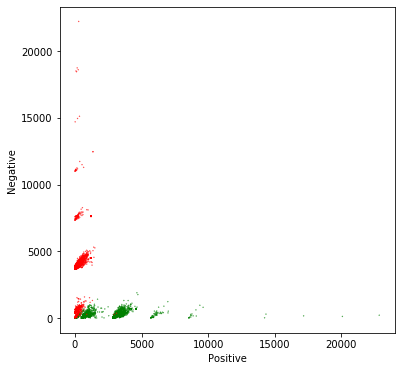

In [28]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (6,6))
colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

In [29]:
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

def direction(theta, pos):
    return pos*theta[2]/theta[1]

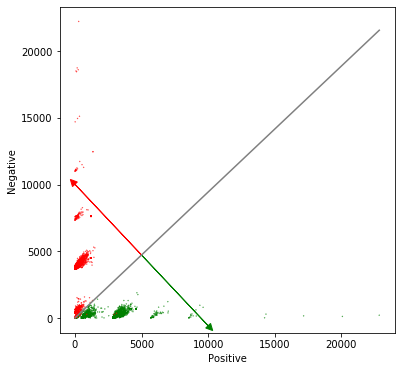

In [34]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (6,6))
colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

# Represent the logistic regression model in the chart.
maxpos = np.max(X[:,1])
offset = 5000

# Plot a gray line that divides the 2 areas.
ax.plot([0,maxpos], [neg(theta,0), neg(theta, maxpos)], color = 'gray')

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500,
        fc='g', ec='g')

# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500,
        fc='r', ec='r')

plt.show()